# Algorithms for Convolution and Pooling:

Courser Google Colage: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb

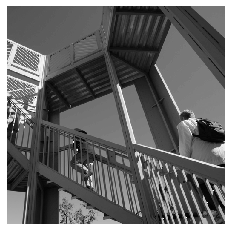

In [5]:
import cv2 
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# ascent image is a built-in image from scipy
i = misc.ascent()

# plot it in matplot
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()


In [6]:
# copy of the same image:
i_transf = np.copy(i)
[size_x, size_y] = i_transf.shape

print(i_transf.shape, size_x, size_y)


(512, 512) 512 512


**Creating a filter:**

In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines.
#Experiment with different values for fun effects.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]  # filter for vertical edges
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]  # filter for horizontal edges

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight = 1

## Convolution (Filtering) Algorithm

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [0]:
# Convolution (Filtering) Algorithm
# we pick up a pixel (avoiding the margin pixels) and apply a dot product of pixel value . filter value of all the 8+1 pixels around
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transf[x, y] = convolution

[Text(0, 0.5, 'y-label'), Text(0.5, 0, 'x-label')]

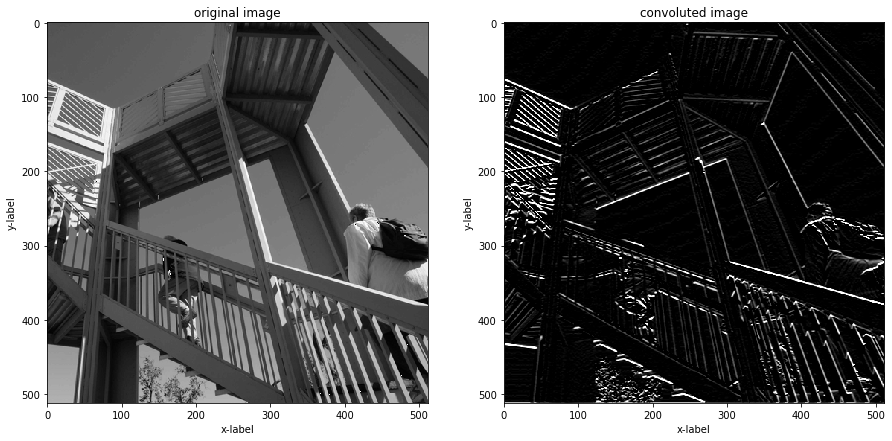

In [33]:
# Plot the transformed image:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(i)
axarr[0].set_title('original image')
axarr[0].set(xlabel='x-label', ylabel='y-label')
axarr[1].imshow(i_transf)
axarr[1].set_title('convoluted image')
axarr[1].set(xlabel='x-label', ylabel='y-label')

## Pooling (Compressing) Algorithm

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

In [0]:
# Pooling (Compressing) Algorithm
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transf[x, y])
    pixels.append(i_transf[x+1, y])
    pixels.append(i_transf[x, y+1])
    pixels.append(i_transf[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)



[Text(0, 0.5, 'y-label'), Text(0.5, 0, 'x-label')]

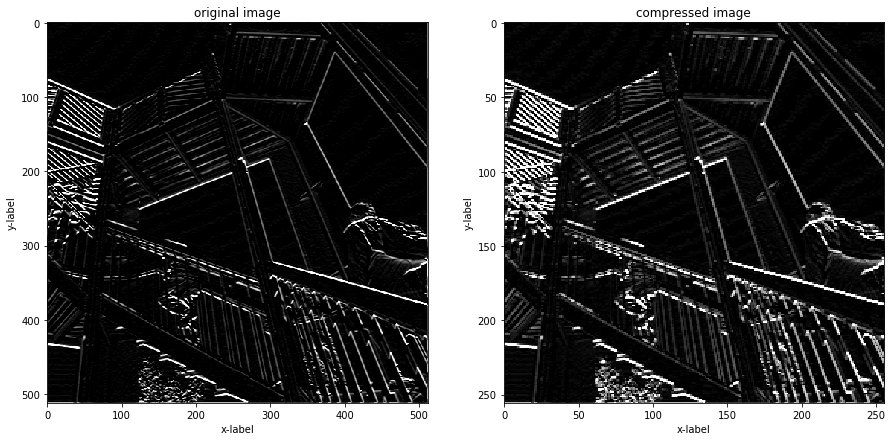

In [34]:
# Plot the compressed image:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(i_transf, label='original image')
axarr[0].set_title('original image')
axarr[0].set(xlabel='x-label', ylabel='y-label')
axarr[1].imshow(newImage, label='compressed image')
axarr[1].set_title('compressed image')
axarr[1].set(xlabel='x-label', ylabel='y-label')